# Documentation

Basically the knowledge base for everything in the implemented and to be implemented.

## Trend Following 


Trend following is an investment or trading strategy which tries to take advantage of long, medium or short-term moves that seem to play out in various markets. According to this strategy, one should buy an asset when its price trend goes up, and sell when its trend goes down, expecting price movements to continue1. One of the first rules of trend following is that price is the main concern. Traders may use other indicators, but price is the primary consideration. Another decisive factor of trend following is not the timing of the trade or the indicator, but rather the decision of how much to trade over the course of the trend1.

The strategy in the below code takes in moving average of 10 days(fast signal) and MA of 50 days(slow signal), so whenever fast signal is greater than the slow signal you buy and vice versa.

In [117]:
import warnings

warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

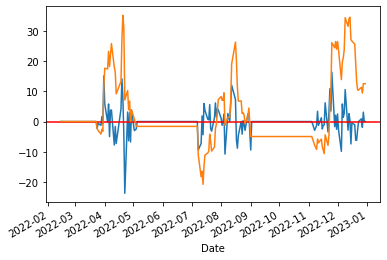

In [118]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

data=df = yf.download(tickers='BPCL.NS', start="2022-01-02", end="2023-1-1")

# getting the means

data["MA-10"]=data.Close.rolling(10).mean()
data["MA-30"]=data.Close.rolling(30).mean()

#this will drop the rows corresponding the number of days in the slow signal
data=data.dropna()

#testing the strategy
conditions = [data['MA-10'] > data['MA-30'], 
              data['MA-10'] < data['MA-30']]

#define choices
choices = [1, 0]

#create new column in DataFrame that displays results of comparisons
data['Position']= np.select(conditions, choices)
data.head()

data['Close_Next'] = data['Close'].shift(-1)
data['Profit'] = [data.loc[i, 'Close_Next'] - data.loc[i, 'Close'] if data.loc[i, 'Position']==1 else 0 for i in data.index]
data['Profit'].plot()
plt.axhline(y=0, color='red')

data['Cum_Profit'] = data['Profit'].cumsum()
data['Cum_Profit'].plot()

# Mean Reversion 

The Mean Reversion strategy assumes that the price of a stock will eventually revert to their long-term average levels. Similar to the behavior of a rubber band, stretch too far out and it will snap back. The strategy operates under the principle that when the price is at a local extreme, it is more likely to revert to a long-term average than continue in the same direction

## Choosing the stock 

A key charactersitci of the mean res=version strategy is that it profits mostly in sideways markets and loses in treding markets and loses in treding markets. Try ***finding stocks that have been trading in a range-boudn environemnt***. This will take into account 2 main conditions: 
* Strong Horizontal S&R: support and resistance. Essentialy this indicated that the stock displays a strong sideways trend. 
* Volatility: Since this represents how large the prices swing around the mean, high volatility could maximise our returns on correct trades.

### Key Indicators 
* ***Bollinger Bands:*** plotting a SD deviation above and beolow a sinmple moving average of the price. Thses 2 can used as parameners and the comincation may be adjusted accordingly/ Serach frothe values that work. Used value in the example are 20 day SMA and 2 SD.
* ***RSI:*** measures the magnitude of recent price changes and evaluates if a stock has been overbought or oversold. The average gain or loss used in the calculation is the average percentage gain or loss during a look-back period.



In [119]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [121]:
import pandas as pd
import plotly.graph_objs as go

# Load data
df = data

# Calculate moving average and standard deviation
df['MA20'] = df['Close'].rolling(window=20).mean()
df['STD20'] = df['Close'].rolling(window=20).std()
df['Date']=df.index

# Calculate upper and lower bands of Bollinger Bands
df['UpperBand'] = df['MA20'] + 2 * df['STD20']
df['LowerBand'] = df['MA20'] - 2 * df['STD20']

# Mark points based on the condition
df['AboveUpperBand'] = df['Close'] > df['UpperBand']
df['BelowLowerBand'] = df['Close'] < df['LowerBand']

# Create traces
trace0 = go.Scatter(x=df.index, y=df['Close'], name='Close')
trace1 = go.Scatter(x=df.index, y=df['MA20'], name='Moving Average 20')
trace2 = go.Scatter(x=df.index, y=df['UpperBand'], name='Upper Band')
trace3 = go.Scatter(x=df.index, y=df['LowerBand'], name='Lower Band')
trace4 = go.Scatter(x=df[df['AboveUpperBand'] == True]['Date'], y=df[df['AboveUpperBand'] == True]['Close'], mode='markers', name='Above Upper Band',marker=dict(color='red'))
trace5 = go.Scatter(x=df[df['BelowLowerBand'] == True]['Date'], y=df[df['BelowLowerBand'] == True]['Close'], mode='markers', name='Below Lower Band',marker=dict(color='green'))

# Plot data
datax = [trace0, trace1, trace2, trace3,trace4,trace5]
layout = go.Layout(title='Bollinger Bands and Moving Averages', template='plotly_dark')
fig = go.Figure(data=datax, layout=layout)
fig.show()

## Momentum Trading 



In [130]:
# Import libraries
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Define parameters
symbol = 'AAPL' # Asset symbol
start = '2022-01-01' # Start date
end = '2022-03-17' # End date
ma_period = 50 # Moving average period

# Get historical data from Yahoo Finance
df = web.DataReader(symbol, 'yahoo', start, end)

# Calculate moving average (MA)
df['MA'] = df['Adj Close'].rolling(ma_period).mean()

# Calculate on balance volume (OBV)
df['OBV'] = 0 # Initialize OBV column with zero values
for i in range(1, len(df)): # Loop through each row except the first one
    if df['Adj Close'][i] > df['Adj Close'][i - 1]: # If current close is higher than previous close 
        df['OBV'][i] = df['OBV'][i - 1] + df['Volume'][i] # Add current volume to previous OBV 
    elif df['Adj Close'][i] < df['Adj Close'][i - 1]: # If current close is lower than previous close 
        df['OBV'][i] = df['OBV'][i - 1] - df['Volume'][i] # Subtract current volume from previous OBV 
    else: # If current close is equal to previous close 
        df['OBV'][i] = df['OBV'][i - 1] # Keep previous OBV 

# Define trading signals

# Buy signal: Price is above MA and OBV is rising 
df['Buy'] = ((df['Adj Close'] > df['MA']) & 
             (df['OBV'].diff() > 0))

# Sell signal: Price is below MA and OBV is falling 
df['Sell'] = ((df['Adj Close'] < df['MA']) & 
              (df['OBV'].diff() < 0))

# Plot data and signals

# Create subplots for price and OBV
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
fig.suptitle('Momentum Trading Strategy with Volume')

# # Plot price, MA, buy and sell signals on first subplot 
# axes[0].plot(df.index, df[['Adj Close', 'MA']])
# axes[0].scatter(df[df.Buy].index,[max(df.Adj Close) * 1.05 for x in range(len(df[df.Buy]))],marker='^')
# axes[0].scatter(df[df.Sell].index,[max(df.Adj Close) * 1.05 for x in range(len(df[df.Sell]))],marker='v')
# axes[0].set_ylabel('Price')
# axes[0].legend(['Price', 'MA', 'Buy', 'Sell'])

# # Plot OBV on second subplot 
# axes[1].plot(df.index, df.OBV)
# axes[1].set_ylabel('On Balance Volume')
# axes[1].legend(['OBV'])

# plt.show()

TypeError: string indices must be integers

In [128]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 616.3 kB/s eta 0:00:001m852.9 kB/s eta 0:00:01


## Pairs Trading
[Resource](https://medium.com/swlh/creating-and-back-testing-a-pairs-trading-strategy-in-python-caa807b70373)

Pairs trading is a mean-reversion strategy that involves trading on two related stocks with similar statistical and economic properties. It aims to exploit short-term deviations from their long-term equilibirium by buying the undervalued stock and selling the overvalued one. Pairs trading requires cointergrated pairs of stocks, which means that their prices move together in the long run. 

First we need to know the difference between correlation and cointergration
***Correlation***: measures the linear relationship between two variables
* ρ = -1, means a perfectly negative relationship. They move in the opposite direction
* ρ = 0, means there is no correlation relationship between the variables
* ρ = 1, means there is a positive correlation relationship betweent he variables this is usually what we are trying to find.


Correlation does not imply causality. It is not used to explain variations in one dataset caused by the other. We use regression analysis for that issue. Negatively correlated assets can be used to hedge one another, and it is the basic diversification rule for portfolio management. If we have two different datasets and their respective variances, we can calculate a measure called covariance. Covariance has the same principle as correlation except excepr that it is unbounded and therefore not really meaningful. It is however used in the formula of correlation
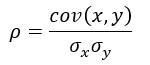

***Cointegration*** It is a statistical property of two or more time series variables that are non-stationary, meaning that their mean and variance change over time. Cointegration means that there is a long-run equilibirium relationship between the variables, such that a linear combinatin of them is stationary, meaning that its mean and variance are constatnt over time. for example, if x and y are both non-stationary time-series, but aX + bY is stationary for some coefficients a and b, then X and Y are cointegrated. 

Cointegration is useful for testing the correlation between non-statinary time series in the long run, and for identifying pairs of stocks that move together in the long run, but may deviate from their equilibirium in the short run. Cointergration can tested using various methods such as the Engle-Granger two-step methods, the Johasen test, or the Philip-Ouliaris test. These methods involve testing for the presence of a ***unit root***. in the linear combiation of the variables. If there is no unit root, then the variables are cointegrated. 

***Unit Root***
A unit root is a feature of some time series that makes them non-stationary, meaning that their mean and variance change over time. A unit root means that 1 is a root of the characteristic equation of the time series, which describes how the current value depends on the past values. A unit root implies that the time series follows a random walk with drift, meaning that it has a systematic pattern that is unpredictable.

A unit root can cause problems in statistical inference involving time series models, such as spurious regressions or invalid assumptions. Therefore, it is important to test for the presence of a unit root before applying any analysis to a time series. There are various tests for unit roots, such as the Dickey-Fuller test, the Phillips-Perron test, or the Zivot-Andrews test. These tests compare the observed time series with a stationary one and check if there is a significant difference.

In [64]:
import yfinance as yf
asset1=yf.download("HDFC.NS", start="2022-01-02", end="2023-1-1")
asset2=yf.download("HDFCAMC.NS", start="2022-01-02", end="2023-1-1")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [65]:
import numpy as np 
np.corrcoef(asset1.Close,asset2.Close)[1][0]


0.7469653091896217

the result of correlation shows that correlation is .95 which is indeed a pretty strong correlation, now we will seperately check whether the two time series are stationay or not, and then check if they are cointegrated or not. 

In [66]:
import statsmodels
statsmodels.tsa.stattools.adfuller()

TypeError: adfuller() missing 1 required positional argument: 'x'

In [67]:
def stationarity(a, cutoff = 0.05):
    #a = np.ravel(a)
    if statsmodels.tsa.stattools.adfuller(a)[1] < cutoff:
        print("The series is stationary")
        print("p-value = ", statsmodels.tsa.stattools.adfuller(a)[1])
    else:
        print("‘The series is NOT stationary’")
        print("‘p-value = ‘", statsmodels.tsa.stattools.adfuller(a)[1])
stationarity(asset1.Close)
stationarity(asset2.Close)

def cointegration(a, b):
    if statsmodels.tsa.stattools.coint(a, b)[1] < 0.05:
        print("‘The series are cointegrated’")
        print("‘p-value = ‘", statsmodels.tsa.stattools.coint(a, b)[1])
    else:
        print("‘The series are NOT cointegrated’")
        print("‘p-value = ‘", statsmodels.tsa.stattools.coint(a, b)[1])
cointegration(asset1.Close, asset2.Close)

‘The series is NOT stationary’
‘p-value = ‘ 0.19518739875483992
‘The series is NOT stationary’
‘p-value = ‘ 0.14216945190970015
‘The series are NOT cointegrated’
‘p-value = ‘ 0.2483335852575963


In [63]:
import pandas as pd
import numpy as np
from datetime import date
from nsepy import symbols
from indicators import *
import yfinance as yf
import sys

#loading the data from the pre-existing csv file
#df=pd.read_csv("data500.csv")
symbols=pd.DataFrame(symbols.get_index_constituents_list("nifty100"))
symbols=symbols['Symbol'].values.tolist()

In [29]:
data_bse = yf.download(tickers='^BSESN', start="2022-01-02", end="2023-1-1")


[*********************100%***********************]  1 of 1 completed


In [25]:
data_dlf = yf.download(tickers='SBIN.NS', start="2022-01-02", end="2023-1-1")


[*********************100%***********************]  1 of 1 completed


In [30]:
import numpy as np 
a=np.corrcoef(data_bse.Close,data_dlf.Close)

In [27]:
a[1][0]

0.8721990548349045

In [31]:
corr_table=pd.DataFrame()
for symbol in symbols:
    try:
        data_tick=yf.download(tickers=symbol+".NS", start="2022-01-02", end="2023-1-1")
        corr=np.corrcoef(data_tick.Close,data_bse.Close)
        temp=pd.DataFrame([(symbol,corr[1][0])])
        corr_table=pd.concat([corr_table,temp])
    except:
        pass
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [34]:
corr_table[corr_table[1]<-0.3]

,0,1
0,BANDHANBNK,-0.487891
0,BIOCON,-0.338391
0,GLAND,-0.360438


In [17]:
pd.read_csv("./stockList.csv").Symbol

0            IDEA
1            GAIL
2      IDFCFIRSTB
3             PNB
4            IDEA
          ...    
545      FINNIFTY
546    ABBOTINDIA
547       PAGEIND
548     NESTLEIND
549           MRF
Name: Symbol, Length: 550, dtype: object